In [179]:
%reload_ext autoreload
%autoreload 2

import pathlib
import sys

import pandas as pd
import seaborn as sns

sys.path.append('../utils')

from ggdrive  import download_file_from_google_drive
from ext_func import diff_lists
from plotting import ordered_countplot_facet_grid, barplot_facet_grid

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [32]:
data_home = pathlib.Path('data')
data_home.mkdir(exist_ok=True)

data_descr_file = data_home/'bank-additional-names.txt'
data_file = data_home/'bank-additional-full.csv'

download_file_from_google_drive(id='1g7dNIkaomwUwx7ALyz__o1FD9pH28u3i', dest=str(data_descr_file))
download_file_from_google_drive(id='1skgN4HNr1snDiyhb-dotzPDR7YrebLuQ', dest=str(data_file))

In [43]:
with open(str(data_descr_file),'r', encoding='utf8') as f:
    print(f.read())
    
data = pd.read_csv(data_file, sep=';')

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [60]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Part 1: EDA

### Univariate analysis  
1. consider features separately  
2. their distributions
3. descriptive statistics
4. anomalies
5. omissions
6. etc.

In [86]:
print(data.info())
display(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [78]:
if data.isna().values.any():
    print(data.isna().sum())
    data.loc[data.isna().any(axis=1)].head()
else:
    print('No NaNs')

No NaNs


In [97]:
numeric_features  = sorted(['age', 'duration', 'pdays', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
nominal_features  = sorted(['job', 'marital', 'contact', 'poutcome'])
ordinals_features = sorted(['education', 'month', 'day_of_week'])
boolean_features  = sorted(['default', 'housing', 'loan', 'y'])
target_feature    = ['y']
not_to_consider   = ['duration']  # we do not know it before a call

In [182]:
data['observation_id'] = data.index

categorical_long_data = pd.melt(data, id_vars=['observation_id'], value_vars=(nominal_features+ordinals_features+boolean_features))
categorical_long_perc_data = (
    categorical_long_data
    .groupby(['variable'])['value']
    .value_counts(normalize=True)
    .reset_index(name='percentage')
)
categorical_long_perc_data['percentage'] = (categorical_long_perc_data['percentage']*100).round(2)

categorical_long_data = categorical_long_data.merge(categorical_long_perc_data, on=['variable', 'value'], how='inner')

numeric_long_data = pd.melt(data, id_vars=['observation_id'], value_vars=nominal_features)

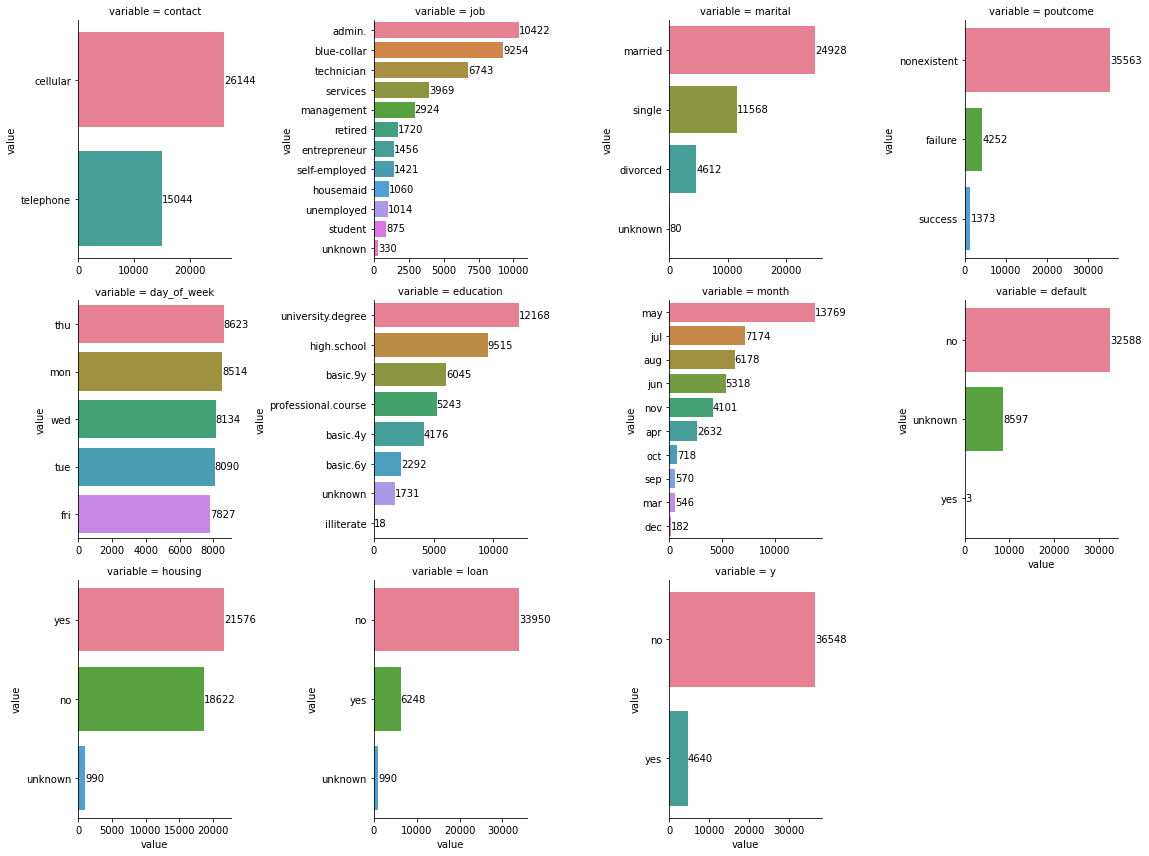

In [176]:
ordered_countplot_facet_grid(
    categorical_long_data, 
    plots_for='variable',
    values_col='value',
    height=4, col_wrap=4, sharex=False, sharey=False
)

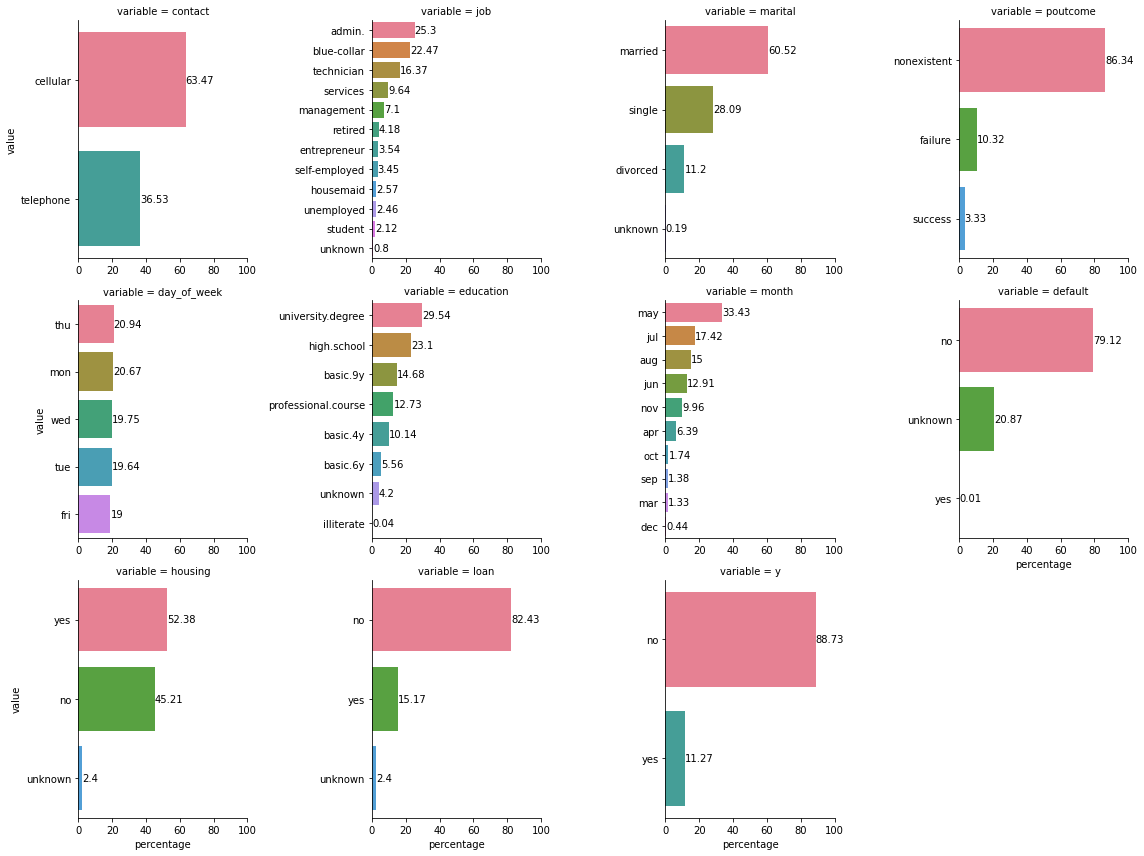

In [187]:
barplot_facet_grid(
    categorical_long_data, 
    plots_for='variable',
    x_col='value',
    y_col='percentage',
    height=4, col_wrap=4, sharex=False, sharey=False
)

**СONCLUSIONS**  
1. There are only 5 unique day_of_week. Possibly it is because bank doesn't work on Saturday and Sunday.
2. Only 10 months.
3. Measurement scales are very diverse in types and ranges: categorical (both nominals and ordinals) and numerical (discrete and continuos).  
4. All objects have defined features, so data is handled and diligently written down. However there are features with missing values represented as 'unknown' or some other constant like '999.0' signs.
5. Missing values are in features **job**, **marital**, **education**, **default**, **housing**, **loan**.
6. Vary few number of clients who subscribed a term deposit, only **11.2%**.
7. High amount of missing values **~21%** inside **default**.